In [25]:
%run -i train_bnn.ipynb

In [26]:

def set_out_filename(filename):
    global out_filename
    out_filename = filename
    with open(out_filename+".txt", "w") as text_file:
        text_file.write("# \n" )

def save_log_to_filename():
    with open(out_filename+ '.txt', "ab") as f:
        np.savetxt(f, np.array([logs['tlos']]))
        #f.write(b"\n")

# experiment with 2 layers

In [27]:
####
set_up_data(3)        # number of input features
num_batches_to_run = 30
selected_to_train = 20   ### "batch size"
num_classes = 2         # binary classification
input_size = sum(select)
hidden_n = 5    # size of hidden layer

n_layers = 2      # number of hidden layers
model = BinaryNet()

criterion = torch.nn.BCEWithLogitsLoss()


In [28]:
model

BinaryNet(
  (fc_list): ModuleList(
    (0): BinaryLinear(in_features=3, out_features=5, bias=False)
    (1): BinaryLinear(in_features=5, out_features=1, bias=False)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (activation): BinaryTanh(
    (hardtanh): Hardtanh(min_val=-1.001, max_val=1.001)
  )
)

In [29]:
class Args():
    epochs = 1    
    log_interval = 1
    learning_rate = 0.01

args = Args()


In [30]:
args.epochs = 1


------
60
--------
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
------
60
--------
[1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------
60
--------
[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
------
60
--------
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.]
------
60
--------
[0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.]
------
60
--------
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
------
60
--------
[0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
------
60
--------
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
------
60
--------
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
------
60
--------
[1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
------
60
--------
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
------
60
--------
[0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------
60
--------
[1. 0. 0.

Text(0.5, 0, 'iteration')

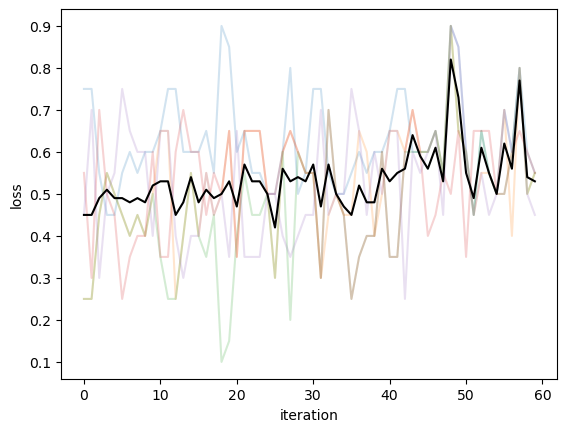

In [13]:
%%time

set_out_filename('2layers_sgd')

args.learning_rate = 0.01
plt.figure()
avg_logs = None 
logs_count = 0
sgd_ls = []
for exp in range(5):
    torch.random.manual_seed(exp)
    model = BinaryNet()
    Train()
    plt.plot(logs['accur'], alpha=0.2)
    save_log_to_filename()
    
    if exp == 0:
        avg_logs = np.array(logs['accur'])
    else:
        avg_logs += np.array(logs['accur'])
    logs_count += 1
    sgd_ls.append(np.array(logs['accur']))

avg_logs /= logs_count
plt.plot(avg_logs, '-k')
        
plt.ylabel('loss')
plt.xlabel('iteration')
# plt.savefig('2layers_sgd.pdf')


In [20]:
%%time

set_out_filename('2layers_qcbo')
#args.learning_rate = 0.001
args.learning_rate = 0.005
plt.figure()
avg_logs = None 
logs_count = 0
sign_sgd_ls = []
for exp in range(5):
    torch.random.manual_seed(exp)
    model = BinaryNet()
    Train(update_type='signsgd')
    # plt.plot(logs['tlos'], alpha=0.2)
    # save_log_to_filename()
    # if exp == 0:
    #     avg_logs = np.array(logs['tlos'])
    # else:
    #     avg_logs += np.array(logs['tlos'])
    # logs_count += 1
    sign_sgd_ls.append(np.array(logs['accur']))
# avg_logs /= logs_count
# plt.plot(avg_logs, '-k')

# plt.ylabel('loss')
# plt.xlabel('iteration')
# #plt.savefig('2layers_qcbo.pdf')


------
60
--------
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
------
60
--------
[1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------
60
--------
[1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
------
60
--------
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.]
------
60
--------
[0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.]
------
60
--------
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
------
60
--------
[0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
------
60
--------
[0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
------
60
--------
[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
------
60
--------
[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
------
60
--------
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
------
60
--------
[0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------
60
--------
[1. 0. 0.

<Figure size 640x480 with 0 Axes>

In [31]:
%%time

set_out_filename('2layers_qcbo')
#args.learning_rate = 0.001
args.learning_rate = 0.008
plt.figure()
avg_logs = None 
logs_count = 1
gurobi_ls = []
for exp in range(5):
    torch.random.manual_seed(exp)
    model = BinaryNet()
    Train(update_type='qubo')
    # plt.plot(logs['tlos'], alpha=0.2)
    # save_log_to_filename()
    # if exp == 0:
    #     avg_logs = np.array(logs['tlos'])
    # else:
    #     avg_logs += np.array(logs['tlos'])
    # logs_count += 1
    gurobi_ls.append(np.array(logs['accur']))
# avg_logs /= logs_count
# plt.plot(avg_logs, '-k')

# plt.ylabel('loss')
# plt.xlabel('iteration')
#plt.savefig('2layers_qcbo.pdf')


------
60
--------
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
------
60
--------
[1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------
60
--------
[0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
------
60
--------
[0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
------
60
--------
[0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.]
------
60
--------
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
------
60
--------
[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
------
60
--------
[1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.]
------
60
--------
[1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
------
60
--------
[1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
------
60
--------
[1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
------
60
--------
[1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
------
60
--------
[1. 0. 1.

<Figure size 640x480 with 0 Axes>

In [32]:
%%time

set_out_filename('2layers_qcbo')
#args.learning_rate = 0.001
args.learning_rate = 0.008
plt.figure()
avg_logs = None 
logs_count = 1
dwave_ls = []
for exp in range(1,5):
    torch.random.manual_seed(exp)
    model = BinaryNet()
    Train(update_type='old_qubo.quantum_anneal_soft_embedded_qubo')
    print('hillow')
    # plt.plot(logs['tlos'], alpha=0.2)
    # save_log_to_filename()
    # if exp == 0:
    #     avg_logs = np.array(logs['tlos'])
    # else:
    #     avg_logs += np.array(logs['tlos'])
    # logs_count += 1
    dwave_ls.append(np.array(logs['accur']))
# avg_logs /= logs_count
# plt.plot(avg_logs, '-k')

# plt.ylabel('loss')
# plt.xlabel('iteration')
# #plt.savefig('2layers_qcbo.pdf')

------
60
--------
[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
------
60
--------
[0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
------
60
--------
[0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
------
60
--------
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
------
60
--------
[1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
------
60
--------
[0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
------
60
--------
[1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
------
60
--------
[1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.]
------
60
--------
[1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
------
60
--------
[1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
------
60
--------
[1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
------
60
--------
[1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
------
60
--------
[0. 1. 1.

<Figure size 640x480 with 0 Axes>

In [16]:
from scipy.ndimage.filters import gaussian_filter1d

arr_gurobi = np.stack(gurobi_ls)
arr_mean_gurobi = np.mean(arr_gurobi, axis=0)
arr_max_gurobi = np.max(arr_gurobi, axis=0)
arr_min_gurobi = np.min(arr_gurobi, axis=0)
arr_mean_gurobi = gaussian_filter1d(arr_mean_gurobi, sigma=1)
arr_max_gurobi = gaussian_filter1d(arr_max_gurobi, sigma=1)
arr_min_gurobi = gaussian_filter1d(arr_min_gurobi, sigma=1)

# with open("acc_gurobi.npy", 'wb') as f:
#     np.save(f, arr_gurobi)

In [17]:
arr_sgd = np.stack(sgd_ls)
arr_mean_sgd = np.mean(arr_sgd, axis=0)
arr_max_sgd = np.max(arr_sgd, axis=0)
arr_min_sgd = np.min(arr_sgd, axis=0)

arr_mean_sgd = gaussian_filter1d(arr_mean_sgd, sigma=1)
arr_max_sgd = gaussian_filter1d(arr_max_sgd, sigma=1)
arr_min_sgd = gaussian_filter1d(arr_min_sgd, sigma=1)
# with open("acc_sgd.npy", 'wb') as f:
#     np.save(f, arr_sgd)

In [21]:
arr_signsgd = np.stack(sign_sgd_ls)
arr_mean_signsgd = np.mean(arr_signsgd, axis=0)
arr_max_signsgd = np.max(arr_signsgd, axis=0)
arr_min_signsgd = np.min(arr_signsgd, axis=0)

arr_mean_signsgd = gaussian_filter1d(arr_mean_signsgd, sigma=1)
arr_max_signsgd = gaussian_filter1d(arr_max_signsgd, sigma=1)
arr_min_signsgd = gaussian_filter1d(arr_min_signsgd, sigma=1)
# with open("acc_sign_sgd.npy", 'wb') as f:
#     np.save(f, arr_sgd)

In [34]:
arr_dwave= np.stack(dwave_ls)
# arr_dwave = np.load("acc_dwave.npy")
arr_mean_dwave = np.mean(arr_dwave, axis=0)
arr_max_dwave = np.max(arr_dwave, axis=0)
arr_min_dwave = np.min(arr_dwave, axis=0)

arr_mean_dwave= gaussian_filter1d(arr_mean_dwave, sigma=1)
arr_max_dwave = gaussian_filter1d(arr_max_dwave, sigma=1)
arr_min_dwave = gaussian_filter1d(arr_min_dwave, sigma=1)
with open("acc_dwave2.npy", 'wb') as f:
    np.save(f, arr_dwave)

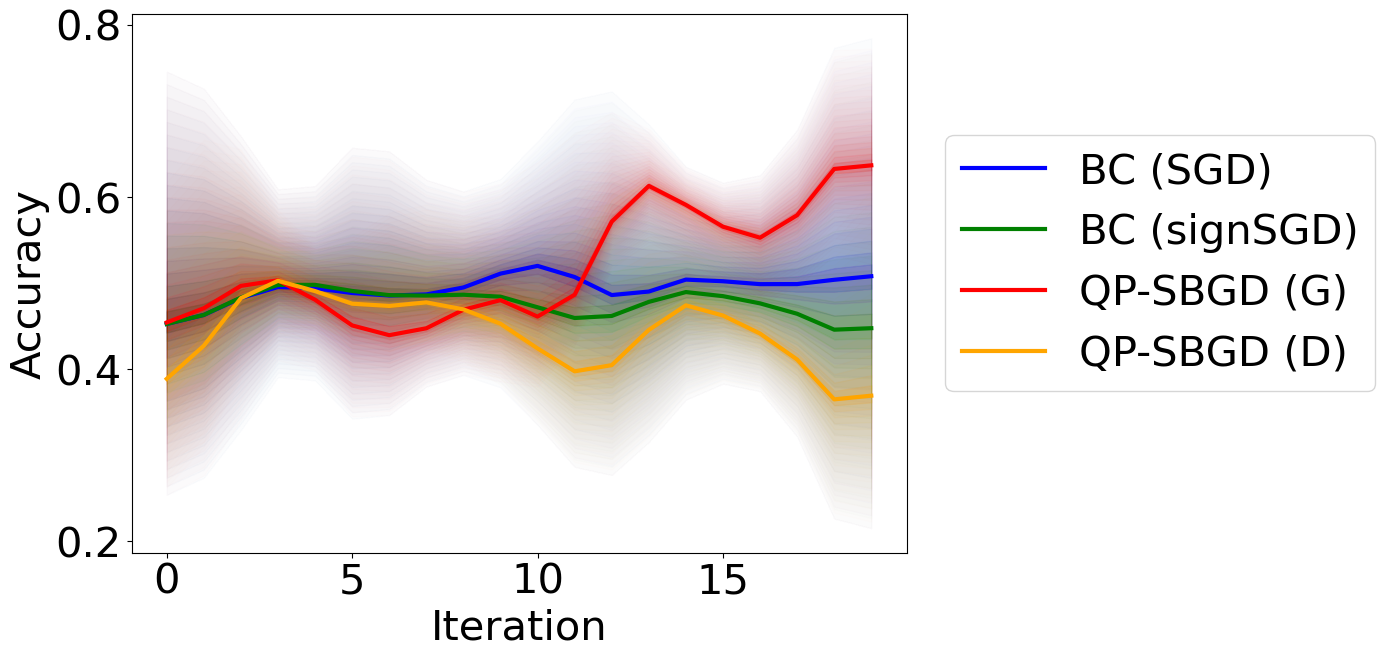

In [37]:
thirty = 20
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 30})
grad = 20
x = range(arr_mean_sgd.shape[0])
plt.plot(x[:thirty], arr_mean_sgd[:thirty], c = 'blue', label="BC (SGD)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_sgd[:thirty] - arr_min_sgd[:thirty]
    dist_2 = arr_max_sgd[:thirty] - arr_mean_sgd[:thirty]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:thirty], arr_mean_sgd[:thirty] - dist_1, arr_mean_sgd[:thirty] + dist_2, color='blue', alpha=1 /(8*i))

plt.plot(x[:thirty], arr_mean_signsgd[:thirty], c = 'green', label="BC (signSGD)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_signsgd[:thirty] - arr_min_signsgd[:thirty]
    dist_2 = arr_max_signsgd[:thirty] - arr_mean_signsgd[:thirty]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:thirty], arr_mean_signsgd[:thirty] - dist_1, arr_mean_signsgd[:thirty] + dist_2, color='green', alpha=1 /(8*i))

plt.plot(x[:thirty], arr_mean_gurobi[:thirty], c = 'red', label="QP-SBGD (G)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_gurobi[:thirty] - arr_min_gurobi[:thirty]
    dist_2 = arr_max_gurobi[:thirty] - arr_mean_gurobi[:thirty]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:thirty], arr_mean_gurobi[:thirty] - dist_1, arr_mean_gurobi[:thirty] + dist_2, color='red', alpha=1 /(8*i))


plt.plot(x[:thirty], arr_mean_dwave[:thirty], c = 'orange', label="QP-SBGD (D)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_dwave[:thirty] - arr_min_dwave[:thirty]
    dist_2 = arr_max_dwave[:thirty] - arr_mean_dwave[:thirty]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:thirty], arr_mean_dwave[:thirty] - dist_1, arr_mean_dwave[:thirty] + dist_2, color='orange', alpha=1 /(8*i))


plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(loc = (1.05,0.3), )
plt.savefig("acc_adult_dwave.pdf", bbox_inches="tight")
plt.show()